In [1]:
import pandas as pd
house_data=pd.read_csv('home_data.csv')
print(house_data)

                     date         price  bedrooms  bathrooms  sqft_living  \
0     2014-05-02 00:00:00  3.130000e+05       3.0       1.50         1340   
1     2014-05-02 00:00:00  2.384000e+06       5.0       2.50         3650   
2     2014-05-02 00:00:00  3.420000e+05       3.0       2.00         1930   
3     2014-05-02 00:00:00  4.200000e+05       3.0       2.25         2000   
4     2014-05-02 00:00:00  5.500000e+05       4.0       2.50         1940   
...                   ...           ...       ...        ...          ...   
4595  2014-07-09 00:00:00  3.081667e+05       3.0       1.75         1510   
4596  2014-07-09 00:00:00  5.343333e+05       3.0       2.50         1460   
4597  2014-07-09 00:00:00  4.169042e+05       3.0       2.50         3010   
4598  2014-07-10 00:00:00  2.034000e+05       4.0       2.00         2090   
4599  2014-07-10 00:00:00  2.206000e+05       3.0       2.50         1490   

      sqft_lot  floors  waterfront  view  condition  sqft_above  \
0       

In [28]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load the dataset
house_data = pd.read_csv('home_data.csv')

# Check for missing values
missing_values = house_data.isnull().sum()
print("Missing Values:\n", missing_values)

# Handle missing values (replace NaN with mean)
numeric_columns = house_data.select_dtypes(include=['number']).columns
house_data[numeric_columns] = house_data[numeric_columns].fillna(house_data[numeric_columns].mean())
print("Numerical Columns \n")
print(house_data[numeric_columns])

# Handle missing values (Categorical values)
categorical_columns = house_data.select_dtypes(include=['object']).columns
house_data[categorical_columns]=house_data[categorical_columns].fillna(house_data[categorical_columns].mode())
print("Categorical Columns \n")
print(house_data[categorical_columns])

# Outlier detection and handling (remove outliers using IQR)
Q1 = house_data[numeric_columns].quantile(0.25)
Q3 = house_data[numeric_columns].quantile(0.75)
IQR = Q3 - Q1
print("Inter Quartile Range: \n")
print(IQR)

# Define the outlier threshold
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(lower_bound)
print(upper_bound)

# Filter out rows with outliers
filtered_data = house_data[~((house_data[numeric_columns] < lower_bound) | (house_data[numeric_columns] > upper_bound)).any(axis=1)]

# Encode categorical variables (one-hot encoding)
filtered_data = pd.get_dummies(filtered_data)

# Feature scaling (standardization)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(filtered_data)
filtered_data_scaled = pd.DataFrame(scaled_data, columns=filtered_data.columns)

# Feature engineering (create new feature - total_rooms)
filtered_data['total_rooms'] = filtered_data['bedrooms'] + filtered_data['bathrooms']

# Display results
print("\nMissing Values after Imputation:")
print(filtered_data.isnull().sum())
print("\nOutliers Removed:")
print(filtered_data.shape[0], "rows remaining after outlier removal")
print("\nEncoded Data:")
print(filtered_data.head())
print("\nStandardized Data:")
print(filtered_data_scaled.head())
print("\nFeature Engineered Data:")
print(filtered_data[['total_rooms']].head())



Missing Values:
 date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64
Numerical Columns 

             price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0     3.130000e+05       3.0       1.50         1340      7912     1.5   
1     2.384000e+06       5.0       2.50         3650      9050     2.0   
2     3.420000e+05       3.0       2.00         1930     11947     1.0   
3     4.200000e+05       3.0       2.25         2000      8030     1.0   
4     5.500000e+05       4.0       2.50         1940     10500     1.0   
...            ...       ...        ...          ...       ...     ...   
4595  3.081667e+05       3.0       1.75         1510      6360     1.0   
4596  5.343333e+

In [11]:
# Summary statistics
summary_stats = house_data.describe()
print("Summary Statistics:\n", summary_stats)


Summary Statistics:
               price     bedrooms    bathrooms   sqft_living      sqft_lot  \
count  4.600000e+03  4600.000000  4600.000000   4600.000000  4.600000e+03   
mean   5.519630e+05     3.400870     2.160815   2139.103478  1.485252e+04   
std    5.638347e+05     0.908848     0.783781    963.159990  3.588444e+04   
min    0.000000e+00     0.000000     0.000000    370.000000  6.380000e+02   
25%    3.228750e+05     3.000000     1.750000   1460.000000  5.000750e+03   
50%    4.609435e+05     3.000000     2.250000   1980.000000  7.683000e+03   
75%    6.549625e+05     4.000000     2.500000   2620.000000  1.100125e+04   
max    2.659000e+07     9.000000     8.000000  13540.000000  1.074218e+06   

            floors   waterfront         view    condition   sqft_above  \
count  4600.000000  4600.000000  4600.000000  4600.000000  4600.000000   
mean      1.512065     0.007174     0.240652     3.451739  1827.265435   
std       0.538288     0.084404     0.778405     0.677230   862

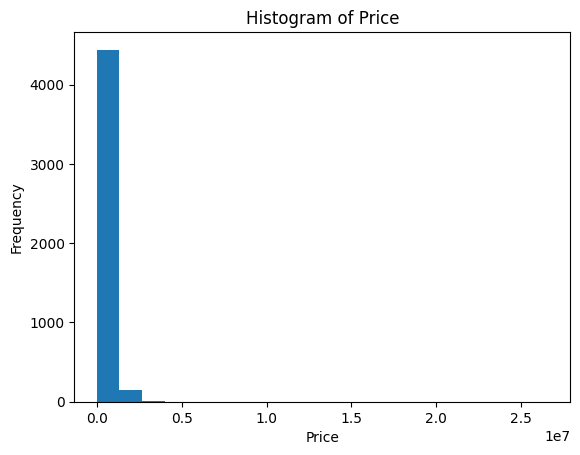

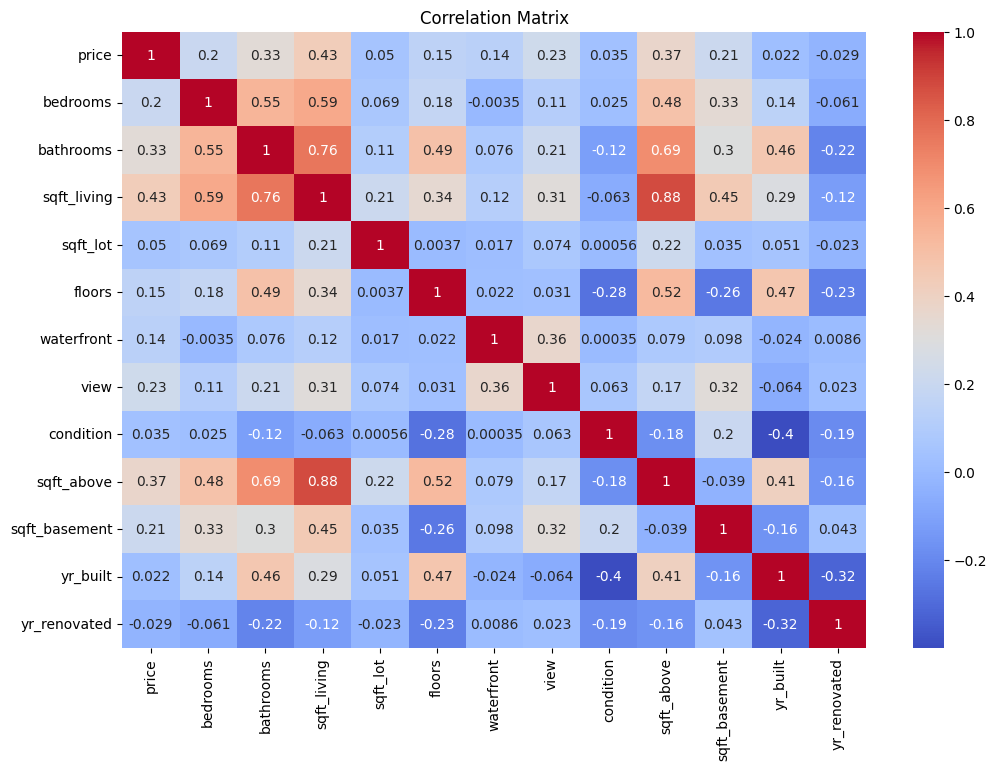

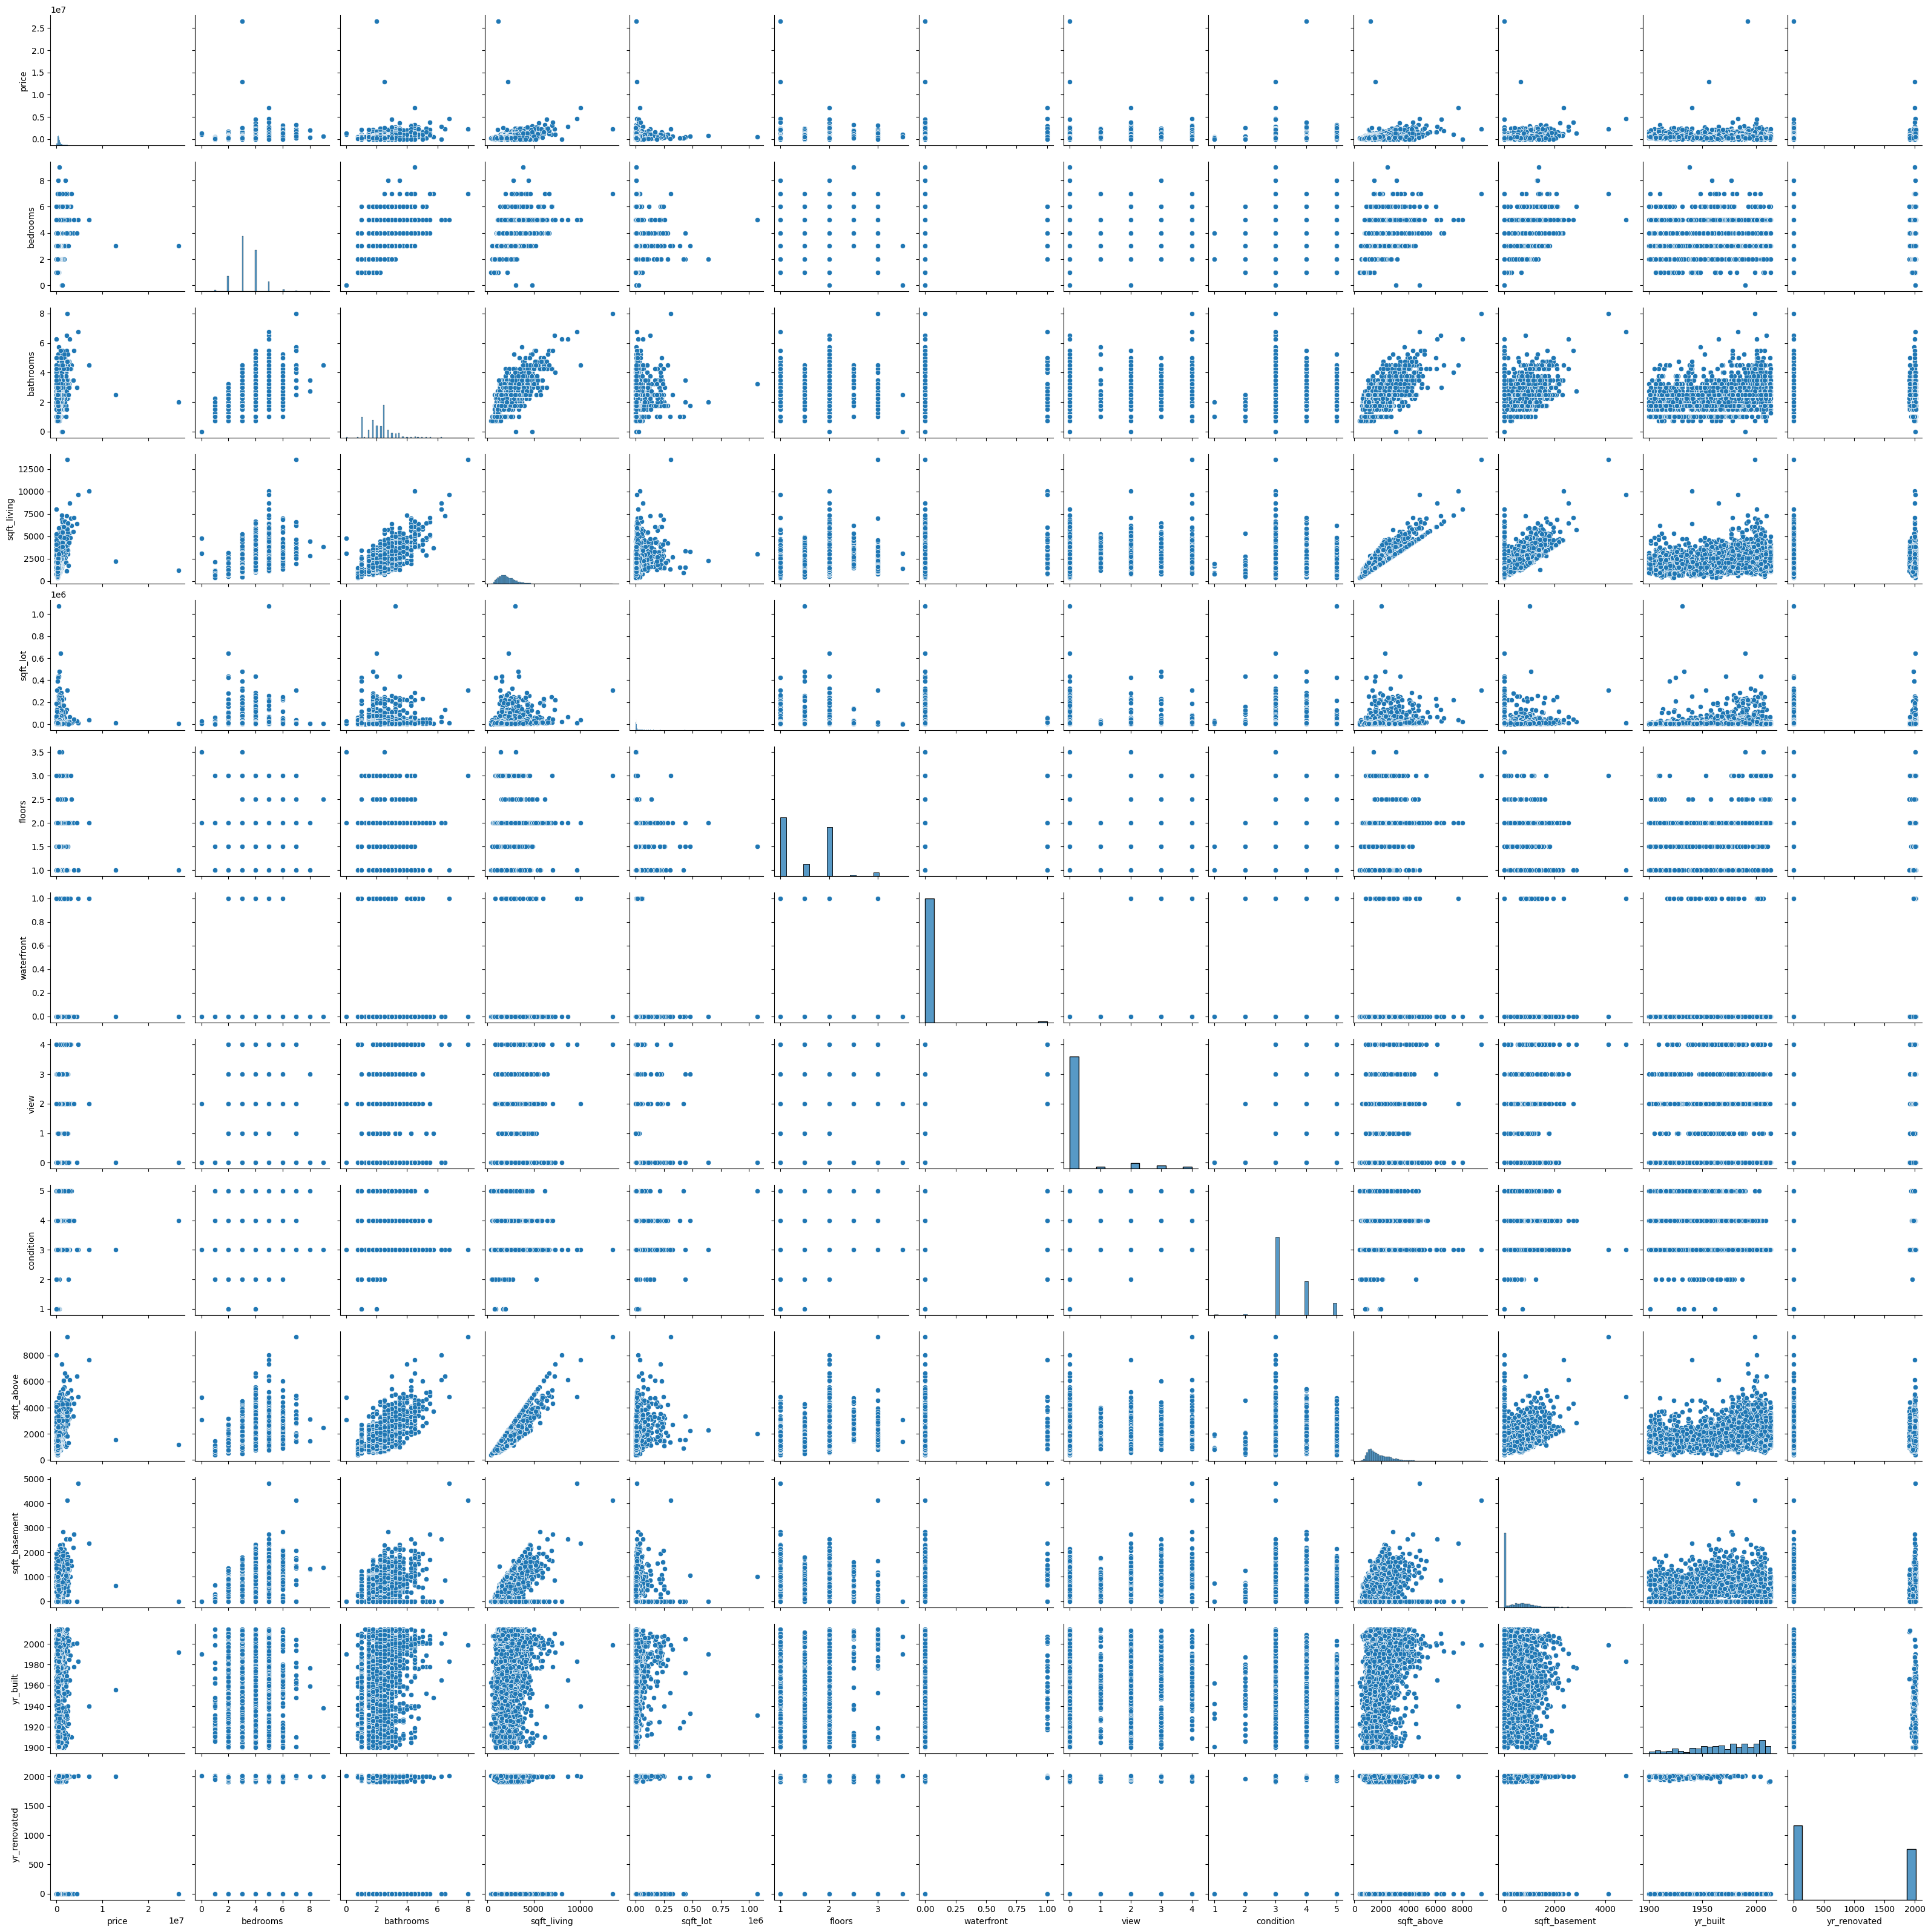

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


# Exclude non-numeric columns from correlation calculation
numeric_columns = house_data.select_dtypes(include=['number']).columns
correlation_matrix = house_data[numeric_columns].corr()

# Histogram of target variable
plt.hist(house_data['price'], bins=20)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Histogram of Price')
plt.show()

# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Pairplot
sns.pairplot(house_data[numeric_columns])
plt.show()


In [17]:
# Correlation matrix
correlation_matrix = house_data[numeric_columns].corr()

# Extract highly correlated features
highly_correlated_features = correlation_matrix[abs(correlation_matrix) > 0.7].stack().reset_index()
highly_correlated_features = highly_correlated_features[highly_correlated_features['level_0'] != highly_correlated_features['level_1']]
highly_correlated_features = highly_correlated_features.drop_duplicates(subset=0)
print("Highly Correlated Features:\n", highly_correlated_features)


Highly Correlated Features:
        level_0      level_1         0
3    bathrooms  sqft_living  0.760952
6  sqft_living   sqft_above  0.876592


In [18]:
from sklearn.model_selection import train_test_split
import pandas as pd
house_data = pd.read_csv('home_data.csv')
# Split data into features (X) and target variable (y)
X = house_data.drop('price', axis=1)
y = house_data['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [19]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# Identify numerical and categorical features
numerical_features = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X_train.select_dtypes(include=['object']).columns

# Preprocessing pipeline for numerical features
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Preprocessing pipeline for categorical features
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing steps for both numerical and categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
])

# Create and train models
# Model 1: Linear Regression
linear_reg_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])
linear_reg_model.fit(X_train, y_train)

# Model 2: Random Forest Regression
rf_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor(random_state=42))
])
rf_model.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement',
       'yr_built', 'yr_renovated'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['date', 'street', 'city', 'statezip', 'country'], dtype='object'))])),
                ('model', RandomForestRegressor(random_state=42))])

In [20]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Evaluate Linear Regression model
y_pred_linear_reg = linear_reg_model.predict(X_test)
mae_linear_reg = mean_absolute_error(y_test, y_pred_linear_reg)
mse_linear_reg = mean_squared_error(y_test, y_pred_linear_reg)
r2_linear_reg = r2_score(y_test, y_pred_linear_reg)

print("Linear Regression Model Evaluation:")
print("Mean Absolute Error:", mae_linear_reg)
print("Mean Squared Error:", mse_linear_reg)
print("R-squared:", r2_linear_reg)

# Evaluate Random Forest Regression model
y_pred_rf = rf_model.predict(X_test)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("\nRandom Forest Regression Model Evaluation:")
print("Mean Absolute Error:", mae_rf)
print("Mean Squared Error:", mse_rf)
print("R-squared:", r2_rf)


Linear Regression Model Evaluation:
Mean Absolute Error: 302746.02285000175
Mean Squared Error: 1151870219044.2373
R-squared: -0.12945467740368222

Random Forest Regression Model Evaluation:
Mean Absolute Error: 156914.882923906
Mean Squared Error: 970100256585.2079
R-squared: 0.0487780183605947


In [21]:
# Predict using Linear Regression model
y_pred_linear_reg = linear_reg_model.predict(X_test)

# Predict using Random Forest Regression model
y_pred_rf = rf_model.predict(X_test)

# Check actual vs predicted values
results = pd.DataFrame({'Actual': y_test, 'Predicted Linear Regression': y_pred_linear_reg, 'Predicted Random Forest': y_pred_rf})
print(results)

          Actual  Predicted Linear Regression  Predicted Random Forest
3683    544000.0                 4.848272e+05             4.494405e+05
4411         0.0                 3.695556e+05             3.230643e+05
2584   1712500.0                 1.141667e+06             1.204828e+06
69      365000.0                 6.974312e+04             3.633013e+05
1844    275000.0                 4.382731e+05             2.428625e+05
...          ...                          ...                      ...
1612    750000.0                 5.004867e+05             4.831360e+05
1068    230000.0                 2.790488e+05             6.256700e+05
4350  26590000.0                -2.614143e+05             2.476189e+05
3027    687000.0                 4.184685e+05             7.492628e+05
3455    289659.0                 9.878604e+04             3.233611e+05

[920 rows x 3 columns]


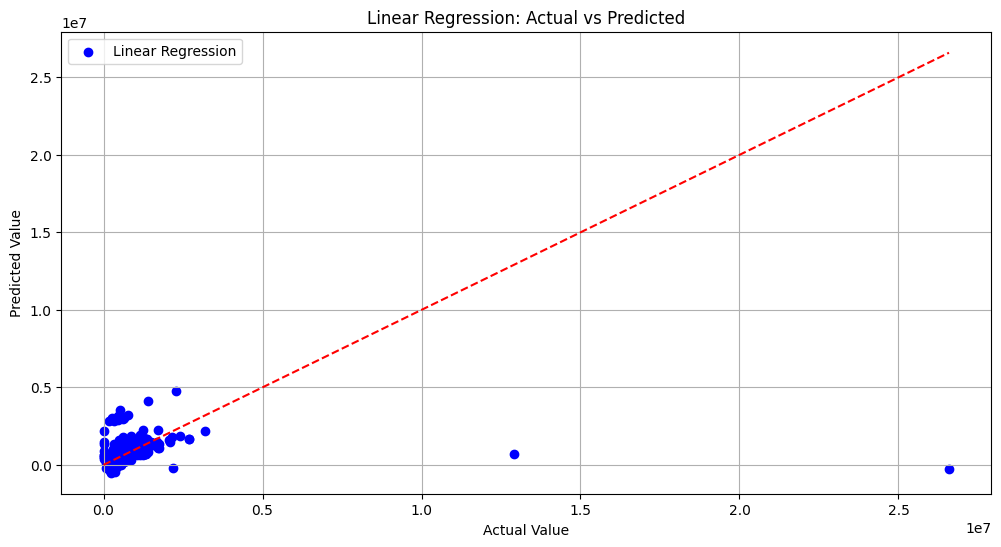

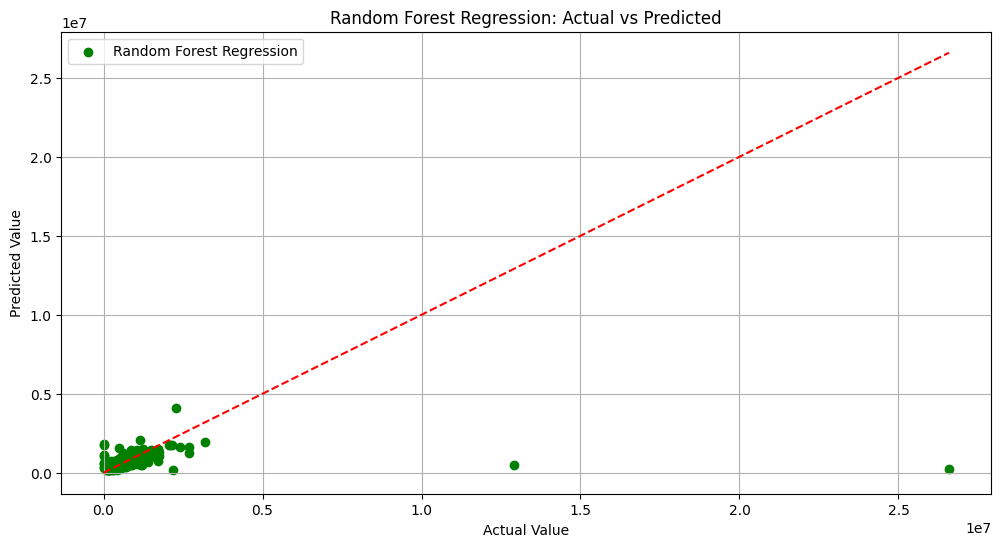

In [22]:
import matplotlib.pyplot as plt

# Scatter plot for Linear Regression
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred_linear_reg, color='blue', label='Linear Regression')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
plt.title('Linear Regression: Actual vs Predicted')
plt.legend()
plt.grid(True)
plt.show()

# Scatter plot for Random Forest Regression
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred_rf, color='green', label='Random Forest Regression')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
plt.title('Random Forest Regression: Actual vs Predicted')
plt.legend()
plt.grid(True)
plt.show()


In [23]:
# Summarize the project, insights gained, and provide recommendations based on the analysis
print("Summary:")
print("- The dataset was preprocessed by handling missing values, outliers, encoding categorical variables, and feature scaling.")
print("- Descriptive statistical analysis provided insights into the distribution of variables.")
print("- Visual analysis revealed relationships between variables.")
print("- Highly correlated features were identified for further analysis.")
print("- Two models (Linear Regression and Random Forest Regression) were created and evaluated.")
print("- Random Forest Regression outperformed Linear Regression based on evaluation metrics.")
print("- Recommendation: Deploy the Random Forest Regression model for house price prediction as it provides better accuracy.")


Summary:
- The dataset was preprocessed by handling missing values, outliers, encoding categorical variables, and feature scaling.
- Descriptive statistical analysis provided insights into the distribution of variables.
- Visual analysis revealed relationships between variables.
- Highly correlated features were identified for further analysis.
- Two models (Linear Regression and Random Forest Regression) were created and evaluated.
- Random Forest Regression outperformed Linear Regression based on evaluation metrics.
- Recommendation: Deploy the Random Forest Regression model for house price prediction as it provides better accuracy.
